In [1]:
#allows any changes on external files to be loaded on code run.
%load_ext autoreload
%autoreload 2

# Running GENE on LUMI to find mode transition within error bounds

Each parameter will be kept at the nominal except one exception. The exception will be altered through it's error bound and the growthrate will be plotted as a function of the exception parameter. 

In [2]:
import sys
import os
pathap = os.path.join('GENE_ML','gene_ml','static_sparse_grid_approximations')
print('PATHAP',pathap)
sys.path.append(pathap)
from GENE_ML.gene_ml.samplers.grid import Grid
from GENE_ML.gene_ml.datagen.datagen import DataGen
from config import config


samplers = []
n_samples = 50
parameters = ['_grp_species_0-omt','_grp_species_1-omt','species-omn']
nominal = [2.7954880, 5.3871083, 1.5417906]
bounds = [(4,6.7), (2.1,3.5), (0.16,2.9)] #if bounds is a float rather than tuple then the sampler will make that the only value
for p,b in zip(parameters, bounds):
    samplers.append(Grid([b], n_samples,[p]))

remote_save_names = ['modeTrans-highprec-'+p for p in parameters]
ex_id_base = 'modeTransTest_'
ex_ids=[ex_id_base+str(i) for i in range(len(samplers))]
data_gens = []
for sampler, remote_save_name, ex_id in zip(samplers, remote_save_names, ex_ids):
    data_gens.append(DataGen(config, sampler, remote_save_name=remote_save_name, guess_sample_wallseconds=200, num_workers=2, ex_id=ex_id))

# import os
# import sys
# pathap = os.path.join('GENE_ML','gene_ml','static_sparse_grid_approximations')
# print('PATHAP',pathap)
# sys.path.append(pathap)

# from GENE_ML.gene_ml.samplers.grid import Grid
# from GENE_ML.gene_ml.executors.ScanExecutor import ScanExecutor
# from GENE_ML.gene_ml.runners.GENErunner import GENErunner
# from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser

# sys.path.append(os.path.join(os.getcwd(),'GENE_ML','enchanted-surrogates','src'))
# parameters = ['_grp_species_0-omt','_grp_species_1-omt','species-omn']
# nominal = [2.7954880, 5.3871083, 1.5417906]

# bounds = [(4,6.7), (2.1,3.5), (0.16,2.9)] #if bounds is a float rather than tuple then the sampler will make that the only value

# samplers = []
# n_samples = 100
# for p,b in zip(parameters, bounds):
#     samplers.append(Grid([b], n_samples,[p]))


# ##Parser
# #The parsers main function is write_input_file
# # wite_input_file takes a parameters file from base_params_path and a set of points in the form of a dict {param1:[point1,point2...], param2:[point1,point2...]...} 
# #  It will then create a parameters file that can scan over all the points.
# base_params_path = os.path.join(os.getcwd(),'parameters_base_uq')
# save_dir = "temp/"
# parser = GENE_scan_parser(save_dir, base_params_path, remote_save_dir=None)

# ## Runner
# #The Runner is responsible for actually running a parameters file on lumi. Its main function is code_run.
# # code_run will take the set of points named samples and parse them into a parameters file.
# #  It then uses ssh to run GENE with this parametres file and a passed sbatch script.
# host = 'lumi3' #needs to be configured in /home/<user>/.ssh/config
# sbatch_base_path = os.path.join('sbatch_base')
# guess_sample_wallseconds = 200 # a guess for the number of seconds it takes to run one sample.
# remote_run_dir = '/project/project_462000451/gene/'
# runner = GENErunner(parser, host, sbatch_base_path, guess_sample_wallseconds, remote_run_dir)

# ##Executor
# #The executor will divide the samples into batches; one for each worker. Each batch will be ran in paralell in seperate sbatch jobs. 
# # The executor should alter a base batch script to account for that less samples will be ran. 
# num_workers = 2
# run_names = ['modeTrans3-'+p for p in parameters]
# remote_save_dirs = [f'/scratch/project_462000451/gene_out/gene_auto/{run_name}' for run_name in run_names]
# executors = []
# for sampler, remote_save_dir in zip(samplers, remote_save_dirs):
#     executors.append(ScanExecutor(num_workers, sampler, runner, remote_save_dir=remote_save_dir))


PATHAP GENE_ML/gene_ml/static_sparse_grid_approximations


In [3]:
# import numpy as np
# ex_ids = np.arange(len(executors))
# for data_gen in data_gens:
#     data_gen.executor.start_runs()

In [4]:
class parent:
    def __init__(self, att):
        self.att = att

class child(parent):
    def yo(self):
        print('nonsence')
child_instance = child(att='at')

print(child_instance.att)
child_instance.att = 'kkk'
print(child_instance.att)


at
kkk


# Pulling Data from LUMI

The data loaded was created by scanning over ion and electron temperature gradients within their margin of uncertainty. 

In [5]:
# remote_save_names = [r+'50' for r in remote_save_names]

In [3]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData
import os
host = 'lumi3'

test_percentage = 0
GENE_groundTruth = []

for data_gen in data_gens:
    ## If the data is already loaded from the remote to local .../scanlogs/<data_name> then the host and remote path can be ommitted
    GENE_groundTruth.append(ScanData(data_gen.remote_save_name, parser=data_gen.parser, host=host, remote_path=data_gen.remote_save_dir,  test_percentage=test_percentage))



Initialising dataset
SSH PATH lumi3:/scratch/project_462000451/gene_out/gene_auto/modeTrans-highprec-_grp_species_0-omt

LOADING FROM SCANLOG DIR: /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-0_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-0_scanfiles-0.log
**SCAN PATH** /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-1_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/geneerr_batch-1_scanfiles-0.log
**SCAN PATH** /home/djdaniel/GENE_UQ/scanlogs/modeTrans-highprec-_grp_species_0-omt/scan_batch-1_scanfiles-0.log

50 SAMPLES RAN OUT OF 55 BEFORE MAX WALLTIME:
NUMBER O

In [4]:
GENE_groundTruth[0].df.head()

,run_time,omt1,growthrate,frequency
0,30.330,4.000000,0.08769,0.03151
1,31.028,4.055102,0.08940,0.03205
2,27.473,4.110204,0.09110,0.03260
3,27.004,4.165306,0.09278,0.03314
4,25.307,4.220408,0.09445,0.03369


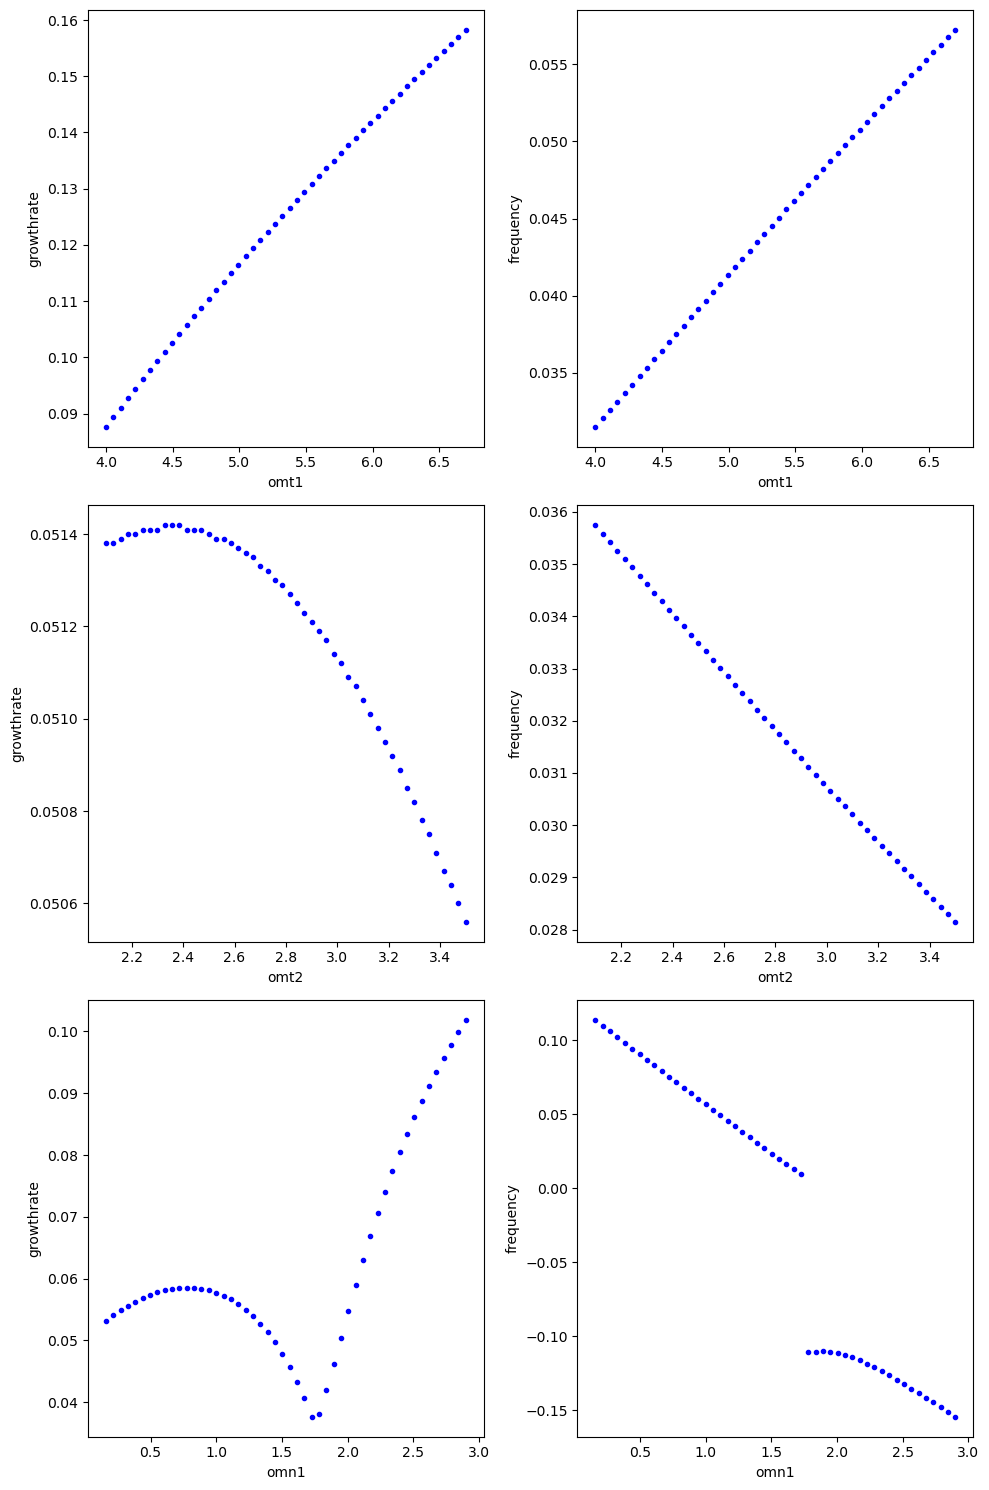

In [5]:
import matplotlib.pyplot as plt
gene_out = ['growthrate','frequency']
width = 5
height =5
ncol = len(gene_out)
nrow = len(GENE_groundTruth)
figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height))

for i in range(len(AX)):
    for j in range(len(AX[0])):
        col = GENE_groundTruth[i].df.columns.values.tolist()
        x = GENE_groundTruth[i].df[col[1]].to_numpy(dtype=float)
        y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
        AX[i][j].plot(x, y, '.b')
        AX[i][j].set_xlabel(col[1])
        AX[i][j].set_ylabel(gene_out[j])
        
figure.tight_layout()
plt.show(figure)


# Plotting Run Time Dependance

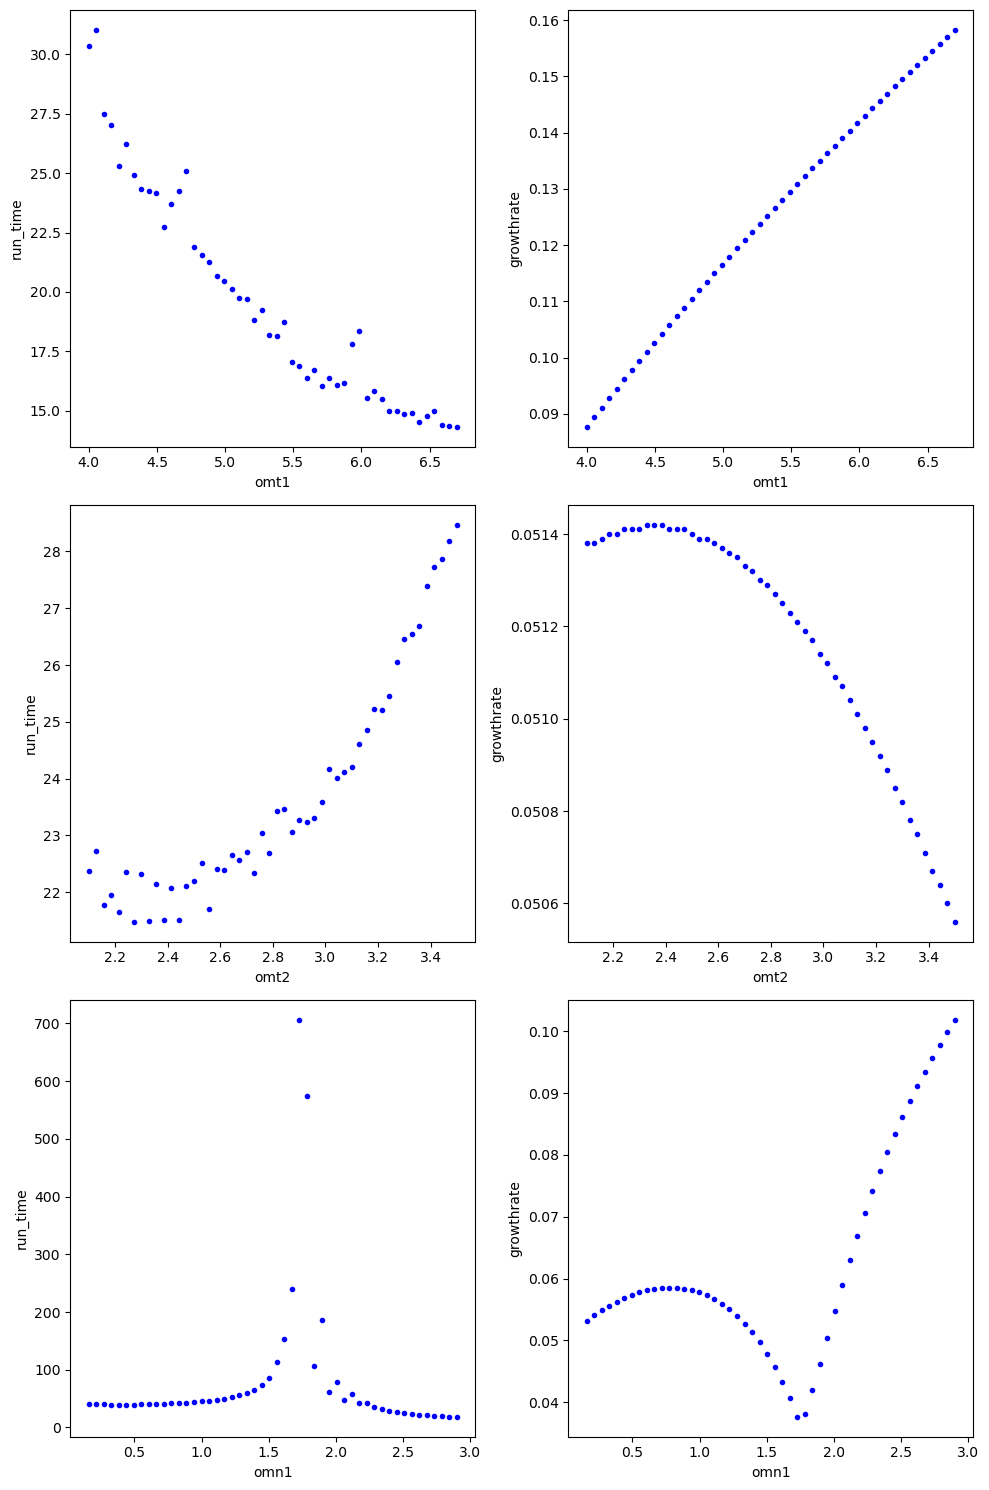

In [6]:
import matplotlib.pyplot as plt
gene_out = ['run_time','growthrate']
width = 5
height =5
ncol = len(gene_out)
nrow = len(GENE_groundTruth)
figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height))

for i in range(len(AX)):
    for j in range(len(AX[0])):
        col = GENE_groundTruth[i].df.columns.values.tolist()
        x = GENE_groundTruth[i].df[col[1]].to_numpy(dtype=float)
        y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
        AX[i][j].plot(x, y, '.b')
        AX[i][j].set_xlabel(col[1])
        AX[i][j].set_ylabel(gene_out[j])
        
figure.tight_layout()
plt.show(figure)


# Running SSG points on GENE-Lumi for ssg_poly training

In [10]:
print(parameters)
print(bounds)

['_grp_species_0-omt', '_grp_species_1-omt', 'species-omn']
[(4, 6.7), (2.1, 3.5), (0.16, 2.9)]


In [7]:
from GENE_ML.gene_ml.samplers.static_sparse_grid import StaticSparseGrid
from GENE_ML.gene_ml.datagen.datagen import DataGen
from config import config

ssg_sampler = StaticSparseGrid(parameters=parameters, bounds=bounds, level=7)
print("NUM SSG SAMPLES",ssg_sampler.num_samples)
ssg_datagen = DataGen(config, ssg_sampler, ex_id='ssg', remote_save_name='ssg-highprec_2omt_omn', guess_sample_wallseconds=200, num_workers=2)
print('PARAMETERS IN SAMPLER', ssg_datagen.executor.sampler.samples.keys())

POINTS SHAPE (84, 3)
 no points for dim = 3 and level = 7 is n = 84
NUM SSG SAMPLES 84
PARAMETERS IN SAMPLER dict_keys(['_grp_species_0-omt', '_grp_species_1-omt', 'species-omn'])


In [12]:
# ssg_datagen.executor.start_runs(ex_id='ssg-highprec_2omt_omn')

# Collecting SSG-point results from LUMI for growthrate and frequency of microinstabilities

In [8]:
from GENE_ML.gene_ml.dataset.ScanData import SSG_ScanData
import os
host = 'lumi'
data_name = 'data_ssg_2omt-highprec_omn'
test_percentage = 0

ssg_data = SSG_ScanData(data_name, ssg_datagen.parser, host=host, remote_path=ssg_datagen.remote_save_dir,  test_percentage=test_percentage)
ssg_data.match_sampler(ssg_sampler)


Initialising dataset
SSH PATH lumi:/scratch/project_462000451/gene_out/gene_auto/ssg-highprec_2omt_omn

LOADING FROM SCANLOG DIR: /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/scan_batch-0_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/geneerr_batch-0_scanfiles-0.log
**SCAN PATH** /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/scan_batch-0_scanfiles-0.log

LOADING SCANLOG AND TIME INTO PANDAS DATAFRAME /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/scan_batch-1_scanfiles-0.log : /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/geneerr_batch-1_scanfiles-0.log
**SCAN PATH** /home/djdaniel/GENE_UQ/scanlogs/data_ssg_2omt-highprec_omn/scan_batch-1_scanfiles-0.log

84 SAMPLES RAN OUT OF 99 BEFORE MAX WALLTIME:
NUMBER OF SAMPLES AFTER REMOVING NaN's: 84
NaN PERCENTAGE =  0.0
SETTING VARIABLES
TEST PERCENTAGE IS 

# Fitting the ssg_poly to the ssg_data

In [13]:
from GENE_ML.gene_ml.models.SSG_POLY import SSG_POLY
poly = SSG_POLY(ssg_sampler=ssg_sampler, name='ssg_poly')
poly.train(y=ssg_data.growthrates)

In [18]:
# import numpoly

# polynomial = poly.get_polynomial()

# polynomial(1,2,3)



5.0927424839866624e-05*q2**6-1.2207238536209933e-05*q0**3*q1**3+4.007677485276953e-05*q1**5*q2+2.9243134957340574e-06*q0**3*q1**2*q2+0.0008437096899537203*q1*q2**5-0.0018427390968188114*q0**4*q1*q2+0.0010367989057779913*q0**4*q2**2-0.0011268451147851322*q0**5*q2-0.000635215132902428*q0**3*q1*q2**2+0.00046455480784939886*q1**6-0.0002282126269004959*q0*q1**5+7.756014297252028e-05*q0**2*q1**2*q2**2-6.945553078797346e-05*q0*q1**3*q2**2+3.9466257327882525e-05*q1**4*q2**2-1.8633367310114042e-05*q0**2*q1**4-0.0003521560628337413*q0**2*q1**3*q2-5.2183919970291466e-05*q0*q1**4*q2-0.0009960856075833904*q0**3*q2**3-6.514473683576944e-06*q0**6-5.880658543910279e-08*q0**4*q1**2+0.0031919745509794294*q0**2*q1*q2**3-3.3023178682045416e-05*q0*q2**5-0.00023626969452940762*q0*q1**2*q2**3+0.0002219872472039917*q1**3*q2**3-1.2225858388946309e-05*q0**5*q1+0.00016956063883191876*q1**2*q2**4+0.0009305406601790862*q0**2*q2**4-0.00016638326924482114*q0*q1*q2**4+0.0049575889503291545*q0*q1**3*q2+0.0019804374076

polynomial([5.0927424839866624e-05*q2**6+3.9466257327882525e-05*q1**4*q2**2+0.00046455480784939886*q1**6+0.00016956063883191876*q1**2*q2**4+4.007677485276953e-05*q1**5*q2+0.0002219872472039917*q1**3*q2**3+0.0008437096899537203*q1*q2**5-0.0003683519314721562*q1**4*q2-0.0010640697282173362*q1**3*q2**2-0.0016224642415471338*q1**2*q2**3-0.006431875012217434*q1*q2**4-0.0026789315124202957*q2**5-0.0070734739873817305*q1**5+0.09470746207023835*q1*q2**3+0.04348439102851975*q1**4+0.005800258392571798*q1**2*q2**2+0.03920178894339709*q2**4-0.007368936915052507*q1**3*q2-0.2936337461411123*q2**3-0.303581822682272*q1*q2**2+0.07039417998054621*q1**2*q2-0.12288120989616765*q1**3+0.11217533445333108*q1**2+1.057731816942691*q2**2-0.6302609181685923*q1*q2+2.494728718948329*q2+1.1864571325258195*q1-5.481355104305757,
            5.0927424839866624e-05*q2**6+3.9466257327882525e-05*q1**4*q2**2+0.00046455480784939886*q1**6+0.00016956063883191876*q1**2*q2**4+4.007677485276953e-05*q1**5*q2+0.000221987247203991

In [20]:
# polynomial([1,3],[2,4],[3,5])


array([4.44931954, 4.06816593])

In [25]:
import numpy as np
import pandas as pd
nominal_block = np.stack([nominal for i in range(len(GENE_groundTruth[0].df))])
nominal_df = pd.DataFrame(nominal_block)
nominal_df.columns=ssg_sampler.parameters

nominal_df

,_grp_species_0-omt,_grp_species_1-omt,species-omn
0,2.795488,5.387108,1.541791
1,2.795488,5.387108,1.541791
2,2.795488,5.387108,1.541791
3,2.795488,5.387108,1.541791
4,2.795488,5.387108,1.541791
5,2.795488,5.387108,1.541791
6,2.795488,5.387108,1.541791
7,2.795488,5.387108,1.541791
8,2.795488,5.387108,1.541791
9,2.795488,5.387108,1.541791


In [26]:
print(GENE_groundTruth[0].df.head(5))
print(ssg_sampler.parameters)
print(ssg_data.df.head())
# ssg_data.set_from_df()
print(ssg_data.x)

  run_time      omt1 growthrate frequency
0   30.330  4.000000    0.08769   0.03151
1   31.028  4.055102    0.08940   0.03205
2   27.473  4.110204    0.09110   0.03260
3   27.004  4.165306    0.09278   0.03314
4   25.307  4.220408    0.09445   0.03369
['_grp_species_0-omt', '_grp_species_1-omt', 'species-omn']
  run_time  _grp_species_0-omt  _grp_species_1-omt  species-omn growthrate  \
0   16.739                5.35                 2.8         1.53    0.12091   
1   17.068                6.70                 2.8         1.53    0.14990   
2   15.260                5.35                 3.5         1.53    0.12286   
3   16.935                5.35                 2.8         2.90    0.09682   
4   14.677                4.00                 2.8         1.53    0.08748   

  frequency  
0   0.06387  
1   0.07666  
2   0.05903  
3  -0.03230  
4   0.04885  
[[5.35       2.8        1.53      ]
 [6.7        2.8        1.53      ]
 [5.35       3.5        1.53      ]
 [5.35       2.8        2.9

# Putting the ground truth in the correct format for inference

i.e. adding in the nominal values.

In [27]:
import pandas as pd
# gt_df = GENE_groundTruth[0].df
# new_df = nominal_df
# new_head = new_df.columns.values.tolist()
# gt_head = gt_df.columns.values.tolist()
# new_df[new_head[0]] = gt_df[gt_head[0]].tolist()
# new_df

for i in range(len(ssg_sampler.parameters)):
    new_df = nominal_df.copy()
    col = GENE_groundTruth[i].df.columns.values.tolist()
    new_df[ssg_sampler.parameters[i]] = GENE_groundTruth[i].df[col[1]].tolist()
    new_df['growthrate']=GENE_groundTruth[i].df['growthrate'].tolist()
    new_df['frequency']=GENE_groundTruth[i].df['frequency'].tolist()
    new_df.insert(0, 'run_time', GENE_groundTruth[i].df['run_time'].to_numpy())
    GENE_groundTruth[i].df = new_df
    GENE_groundTruth[i].set_from_df()
    
    print(GENE_groundTruth[i].x[0:5])
    print(ssg_sampler.parameters)
    print('NEW DF', GENE_groundTruth[i].df.head(5))


TEST PERCENTAGE IS 0, NO SPLIT
[[4.        5.3871083 1.5417906]
 [4.055102  5.3871083 1.5417906]
 [4.110204  5.3871083 1.5417906]
 [4.165306  5.3871083 1.5417906]
 [4.220408  5.3871083 1.5417906]]
['_grp_species_0-omt', '_grp_species_1-omt', 'species-omn']
NEW DF   run_time  _grp_species_0-omt  _grp_species_1-omt  species-omn growthrate  \
0   30.330            4.000000            5.387108     1.541791    0.08769   
1   31.028            4.055102            5.387108     1.541791    0.08940   
2   27.473            4.110204            5.387108     1.541791    0.09110   
3   27.004            4.165306            5.387108     1.541791    0.09278   
4   25.307            4.220408            5.387108     1.541791    0.09445   

  frequency  
0   0.03151  
1   0.03205  
2   0.03260  
3   0.03314  
4   0.03369  
TEST PERCENTAGE IS 0, NO SPLIT
[[2.795488  2.1       1.5417906]
 [2.795488  2.128571  1.5417906]
 [2.795488  2.157143  1.5417906]
 [2.795488  2.185714  1.5417906]
 [2.795488  2.214286

In [33]:
# te = GENE_groundTruth[0].x

# te1, te2, te3 = te.T

# te1

array([4.      , 4.055102, 4.110204, 4.165306, 4.220408, 4.27551 ,
       4.330612, 4.385714, 4.440816, 4.495918, 4.55102 , 4.606122,
       4.661224, 4.716327, 4.771429, 4.826531, 4.881633, 4.936735,
       4.991837, 5.046939, 5.102041, 5.157143, 5.212245, 5.267347,
       5.322449, 5.377551, 5.432653, 5.487755, 5.542857, 5.597959,
       5.653061, 5.708163, 5.763265, 5.818367, 5.873469, 5.928571,
       5.983673, 6.038776, 6.093878, 6.14898 , 6.204082, 6.259184,
       6.314286, 6.369388, 6.42449 , 6.479592, 6.534694, 6.589796,
       6.644898, 6.7     ])

# Save results of ssg_poly Ground Truth reference point inference

In [37]:
import os
from GENE_ML.gene_ml.results.results import ResultsGroundTruthTest

results_poly_gt = ResultsGroundTruthTest(name='results_poly_gt-highprec')

if os.path.exists(results_poly_gt.path):
    print('\nLOADING RESULTS FROM FILE\n')
    results_poly_gt = results_poly_gt.load()
    print(f'{results_poly_gt.name} IS LOADED')
else:
    results_poly_gt.altered_parameters_names = GENE_groundTruth[0].df.columns.values.tolist()
    for i in range(len(GENE_groundTruth)):
        print('\nCOMPUTING RESULTS\n')
        #Sampling already done, gene has been ran
        print("GT DATA NAME",GENE_groundTruth[i].name)
        results_poly_gt.growthrates.append(poly.predict(GENE_groundTruth[i].x))
    results_poly_gt.save()


COMPUTING RESULTS

GT DATA NAME modeTrans-highprec-_grp_species_0-omt
PREDICTION WALL TIME dd-hh:mm:ss | 00-00:00:14

COMPUTING RESULTS

GT DATA NAME modeTrans-highprec-_grp_species_1-omt
PREDICTION WALL TIME dd-hh:mm:ss | 00-00:00:13

COMPUTING RESULTS

GT DATA NAME modeTrans-highprec-species-omn
PREDICTION WALL TIME dd-hh:mm:ss | 00-00:00:13


# Plotting SSG results of ground truth experiment

0    4.000000
1    4.055102
Name: _grp_species_0-omt, dtype: float64
0    4.000000
1    4.055102
Name: _grp_species_0-omt, dtype: float64
0    2.100000
1    2.128571
Name: _grp_species_1-omt, dtype: float64
0    2.100000
1    2.128571
Name: _grp_species_1-omt, dtype: float64
0    0.160000
1    0.215918
Name: species-omn, dtype: float64
0    0.160000
1    0.215918
Name: species-omn, dtype: float64


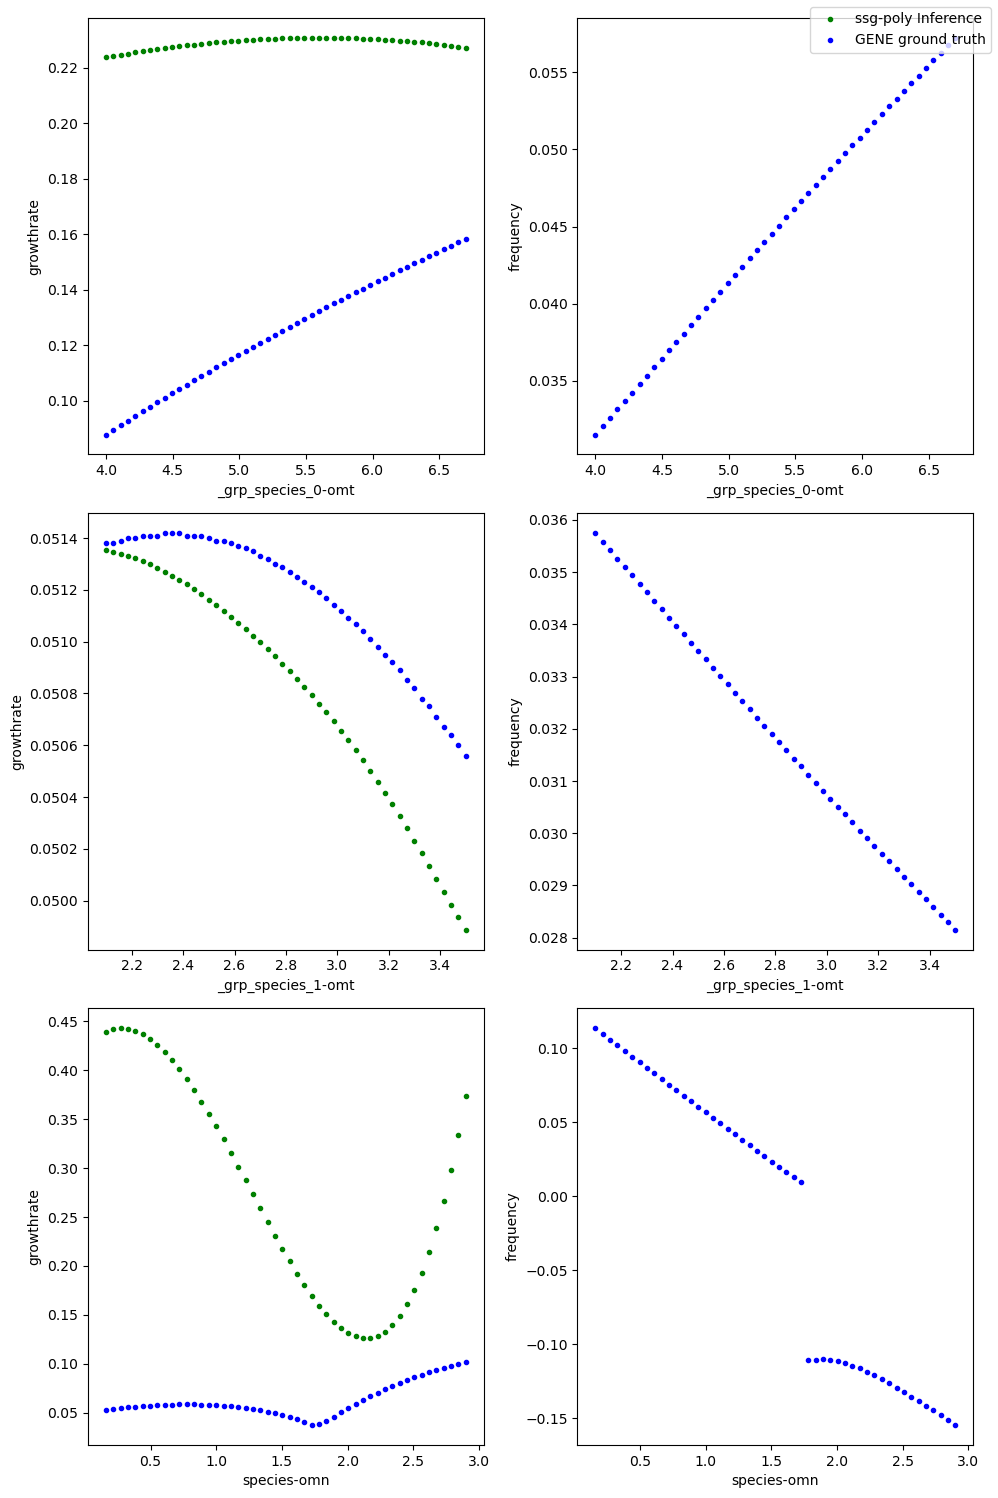

In [38]:
import matplotlib.pyplot as plt
gene_out = ['growthrate','frequency']
width = 5
height =5
ncol = len(gene_out)
nrow = len(GENE_groundTruth)
figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height))

for i in range(len(AX)):
    for j in range(len(AX[0])):
        if i == 0 and j == 0: 
            infer_label = 'ssg-poly Inference'
            gene_label = 'GENE ground truth'
        else:
            infer_label = None
            gene_label = None

        # col = GENE_groundTruth[i].df.columns.values.tolist()
        print(GENE_groundTruth[i].df[parameters[i]].head(2))
        x = GENE_groundTruth[i].df[parameters[i]].to_numpy(dtype=float)
        y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
        
        if j == 0:
            AX[i][j].plot(x, results_poly_gt.growthrates[i], '.g', label=infer_label)

        AX[i][j].plot(x, y, '.b', label =gene_label)
        AX[i][j].set_xlabel(parameters[i])
        AX[i][j].set_ylabel(gene_out[j])
        
figure.tight_layout()
figure.legend()
plt.show(figure)


# fit GPR to SSG points

In [39]:
from GENE_ML.gene_ml.models.GPR import GPR
gpr = GPR(name='gpr_ssg_points_gt')
gpr.tune_hypers(x=ssg_data.x, y=ssg_data.growthrates)

OPTIMISING THE HYPERPERS
CURRENT HYPERS:
 
Name : GP regression
Objective : 80.10808581442501
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |   (3,)  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:


 /home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in divide
 /home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
 /home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square


Optimization restart 1/3, f = -434.6937940255208
Optimization restart 2/3, f = -434.6937953831964
Optimization restart 3/3, f = -434.6937954683284
RESULTING HYPERS:
 
Name : GP regression
Objective : -434.6937954683284
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |   0.005581996270570375  |      +ve      |        
  rbf.lengthscale          |                   (3,)  |      +ve      |        
  Gaussian_noise.variance  |  7.864991962538563e-16  |      +ve      |        


# Save results of GPR Ground Truth reference point inference

In [40]:
import os
from GENE_ML.gene_ml.results.results import ResultsGroundTruthTest

results_gpr_gt = ResultsGroundTruthTest(name='results_gpr-ssg_gt-highprec')

if os.path.exists(results_gpr_gt.path):
    print('\nLOADING RESULTS FROM FILE\n')
    results_gpr_gt = results_gpr_gt.load()
    print(f'{results_gpr_gt.name} IS LOADED')
else:
    results_gpr_gt.altered_parameters_names = GENE_groundTruth[0].df.columns.values.tolist()
    for i in range(len(GENE_groundTruth)):
        print('\nCOMPUTING RESULTS\n')
        #Sampling already done, gene has been ran
        print("GT DATA NAME",GENE_groundTruth[i].name)
        results_gpr_gt.growthrates.append(gpr.predict(GENE_groundTruth[i].x))
    results_gpr_gt.save()


LOADING RESULTS FROM FILE

results_gpr-ssg_gt-highprec IS LOADED


# Plotting results of GPR-ssg ground truth experiment

0    4.000000
1    4.055102
Name: _grp_species_0-omt, dtype: float64
0    4.000000
1    4.055102
Name: _grp_species_0-omt, dtype: float64
0    2.100000
1    2.128571
Name: _grp_species_1-omt, dtype: float64
0    2.100000
1    2.128571
Name: _grp_species_1-omt, dtype: float64
0    0.160000
1    0.215918
Name: species-omn, dtype: float64
0    0.160000
1    0.215918
Name: species-omn, dtype: float64


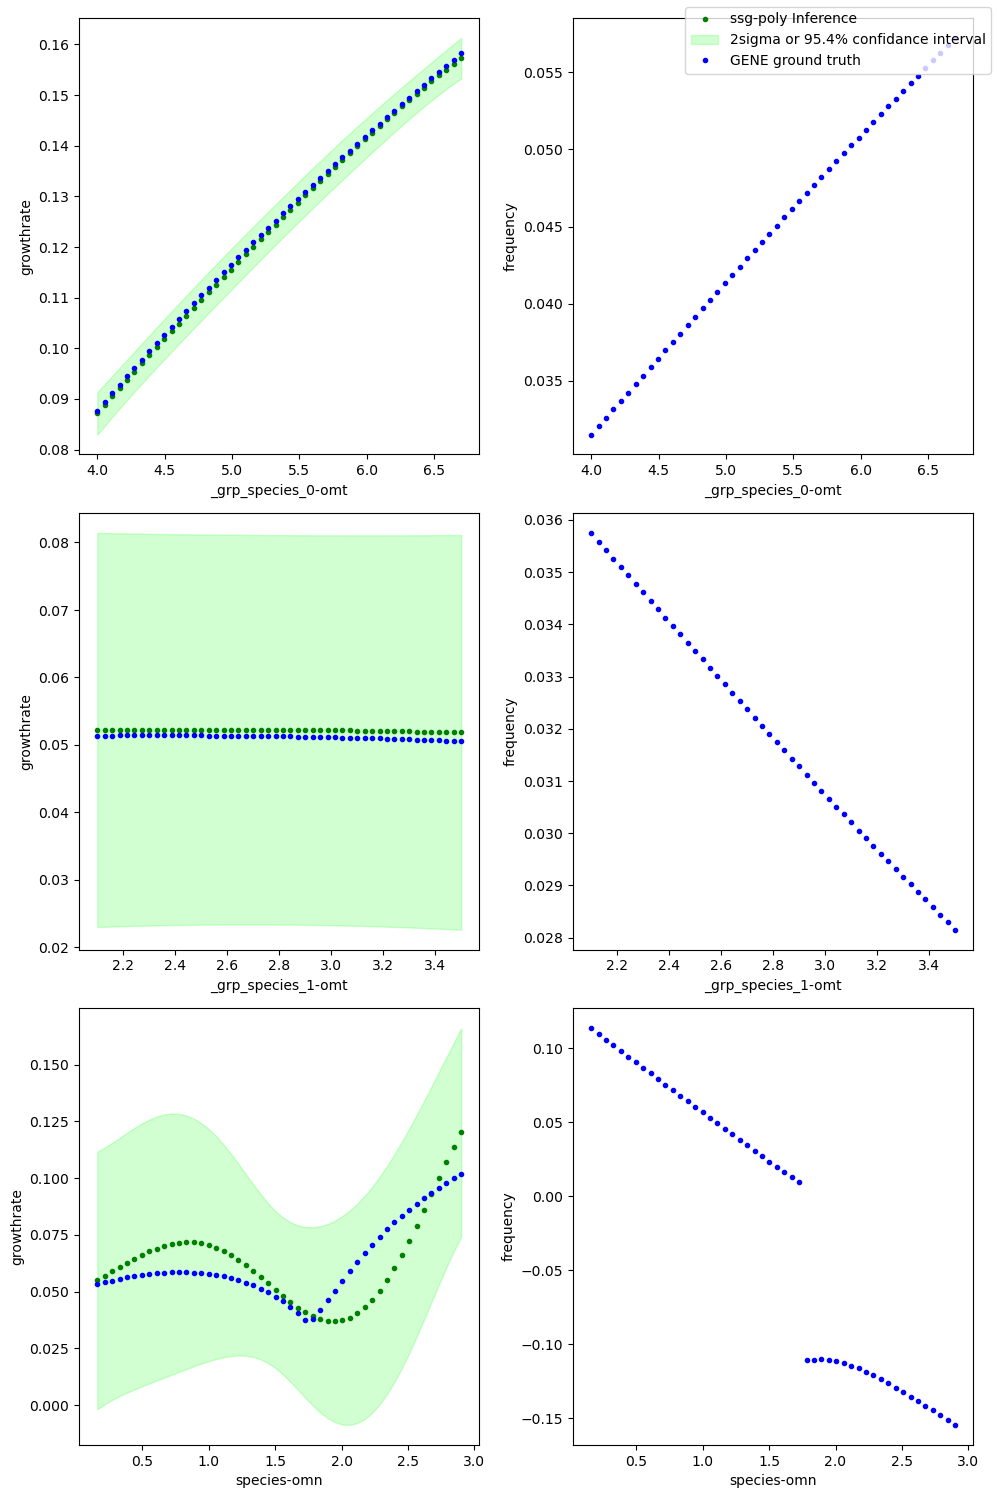

In [41]:
# import matplotlib.pyplot as plt
# gene_out = ['growthrate','frequency']
# width = 5
# height =5
# ncol = len(gene_out)
# nrow = len(GENE_groundTruth)
# figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height))

# for i in range(len(AX)):
#     for j in range(len(AX[0])):
#         if i == 0 and j == 0: 
#             infer_label = 'ssg-GPR Inference'
#             gene_label = 'GENE ground truth'
#             error_label = '2sigma or 95.4% confidance interval'
#         else:
#             infer_label = None
#             gene_label = None
#             error_label = None
#         col = GENE_groundTruth[i].df.columns.values.tolist()
#         x = GENE_groundTruth[i].df[col[i]].to_numpy(dtype=float)
#         y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
        
#         # if j == 0:
#         #     mean = results_gpr_gt.growthrates[i][0]
#         #     twosig = results_gpr_gt.growthrates[i][1]
#         #     AX[i][j].plot(x, mean, '.g', label = infer_label)
#         #     AX[i][j].fill_between(x, mean+twosig, mean-twosig, color=[0.1,1,0.1,0.2], label=error_label)

#         AX[i][j].plot(x, y, '.b', label = gene_label)
#         AX[i][j].set_xlabel(col[i])
#         AX[i][j].set_ylabel(gene_out[j])
        
# figure.legend()
# figure.tight_layout()
# plt.show(figure)

import matplotlib.pyplot as plt
gene_out = ['growthrate','frequency']
width = 5
height =5
ncol = len(gene_out)
nrow = len(GENE_groundTruth)
figure, AX = plt.subplots(nrow,ncol, figsize=(ncol*width, nrow*height))

for i in range(len(AX)):
    for j in range(len(AX[0])):
        if i == 0 and j == 0: 
            infer_label = 'ssg-poly Inference'
            gene_label = 'GENE ground truth'
            error_label = '2sigma or 95.4% confidance interval'
        else:
            infer_label = None
            gene_label = None
            error_label = None
        print(GENE_groundTruth[i].df[parameters[i]].head(2))
        x = GENE_groundTruth[i].df[parameters[i]].to_numpy(dtype=float)
        y = GENE_groundTruth[i].df[gene_out[j]].to_numpy(dtype=float)
        
        if j == 0:
            mean = results_gpr_gt.growthrates[i][0]
            twosig = results_gpr_gt.growthrates[i][1]
            AX[i][j].plot(x, mean, '.g', label = infer_label)
            AX[i][j].fill_between(x, mean+twosig, mean-twosig, color=[0.1,1,0.1,0.2], label=error_label)

        AX[i][j].plot(x, y, '.b', label =gene_label)
        AX[i][j].set_xlabel(parameters[i])
        AX[i][j].set_ylabel(gene_out[j])
        
figure.tight_layout()
figure.legend()
plt.show(figure)


# Testing SSG_Polynomial

In [42]:
import os
from GENE_ML.gene_ml.results.results import Results

#numsamples_numparameters_model_testpercentage
results_poly_name = f'random_data_{rand_test_percentage}tp_poly.results'#f'uq_results_{num_samples}s_{len(parameters)}p_{model_name}_{test_percentage}tp' #
results_poly = Results(results_poly_name)

if os.path.exists(results_poly.path):
    print('\nLOADING RESULTS FROM FILE\n')
    results_poly = results_poly.load()
    print(f'{results_poly.name} IS LOADED')
else:
    print('\nCOMPUTING RESULTS\n')
    #Sampling already done, gene has been ran
    
    results_poly.growthrate_predict_seen = poly.predict(SSG_data.x_train)
    results_poly.growthrate_predict_unseen = poly.predict(random_data.x_test)

    results_poly.save()

# results_poly.growthrate_predict_seen = poly.predict(SSG_data.x_train)
# results_poly.growthrate_predict_unseen = poly.predict(random_data.x_test)


NameError: name 'rand_test_percentage' is not defined

NO UNCERTAINTY PROVIDED
NO UNCERTAINTY PROVIDED


/tmp/ipykernel_100502/922253150.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_residuals.show()


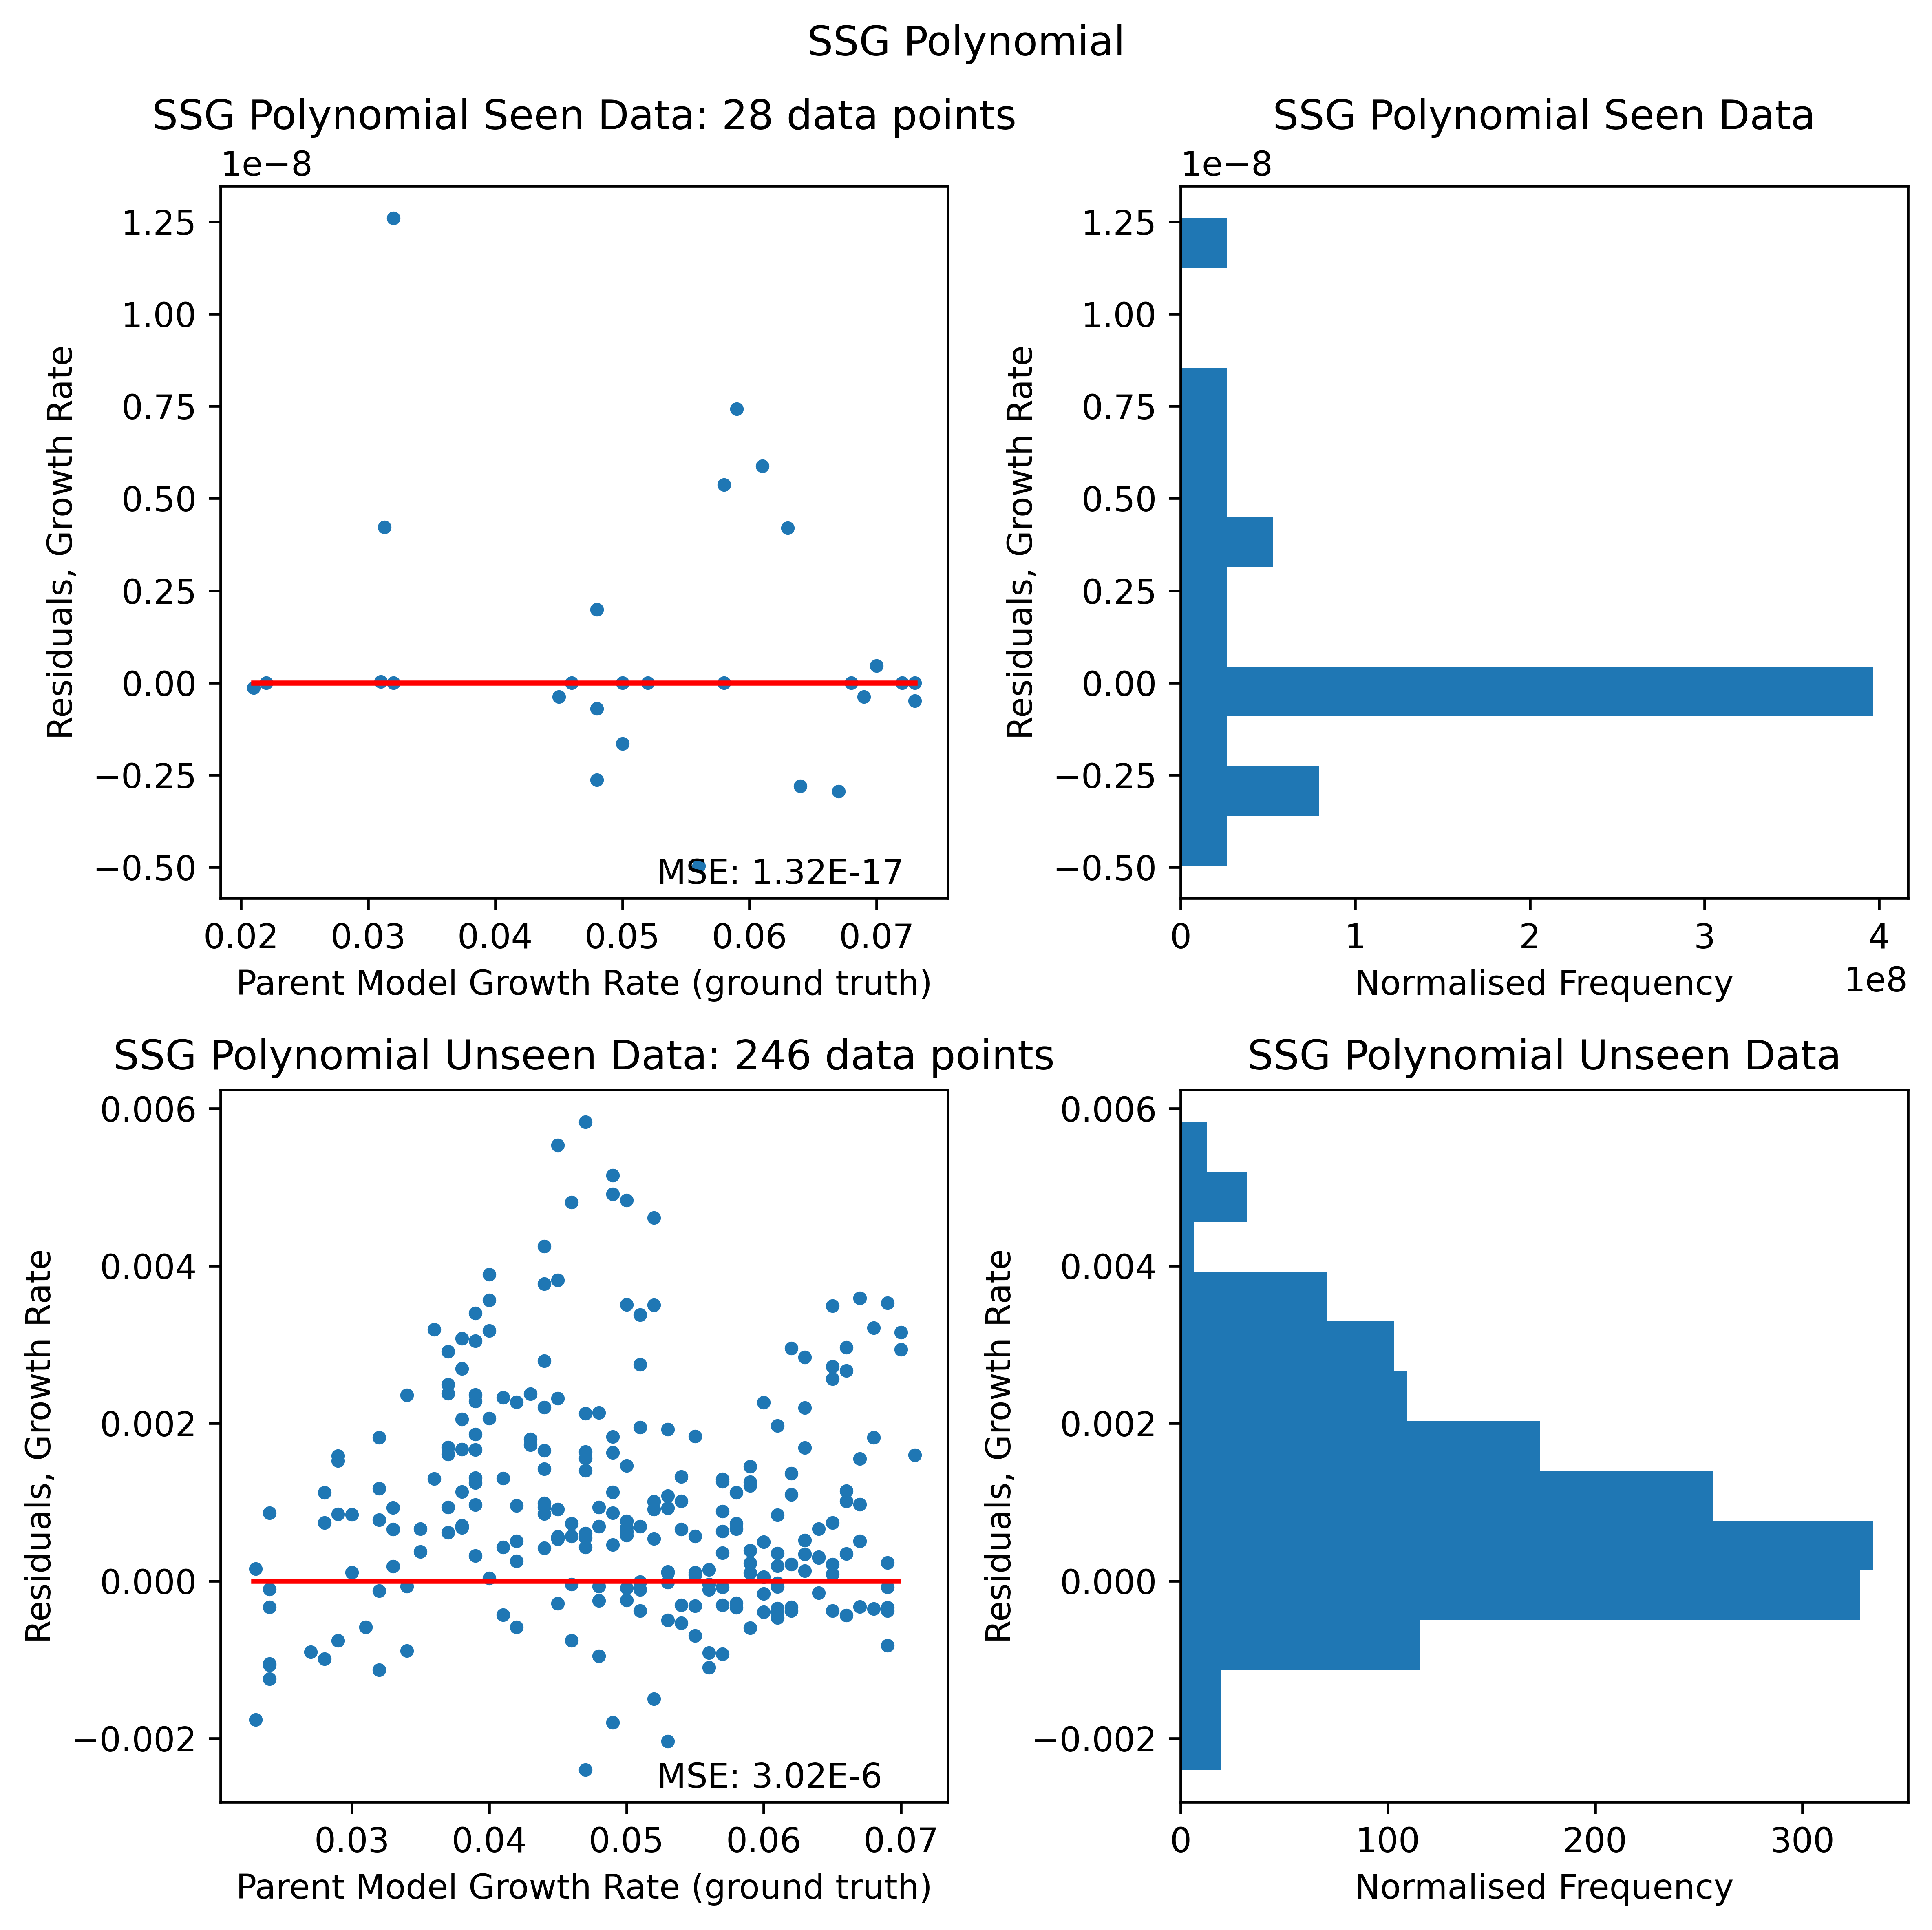

In [ ]:
import matplotlib.pyplot as plt
from GENE_ML.gene_ml import visualise as vis

ncol=2
nrow=2
size=4
model_name = 'SSG Polynomial'
fig_residuals, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrow,ncol, figsize=(size*ncol,size*nrow), dpi=600)

vis.residual_plot(ax1, fig_residuals, SSG_data.growthrate_train, results_poly.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')
vis.residual_hist(ax2, fig_residuals, SSG_data.growthrate_train, results_poly.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data', bins=13)

vis.residual_plot(ax3, fig_residuals, random_data.growthrate_test, results_poly.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')
vis.residual_hist(ax4, fig_residuals, random_data.growthrate_test, results_poly.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data', bins=13)

# ax4.sharex(ax2)

fig_residuals.suptitle(model_name)
fig_residuals.tight_layout()
fig_residuals.show()

# Training GPR Surrogate Model 

In [43]:
import os
from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml.results.results import Results

#numsamples_numparameters_model_testpercentage
model_name = 'GPR'
results_gpr_name = f'random_data_{rand_test_percentage}tp_gpr.results'#f'uq_results_{num_samples}s_{len(parameters)}p_{model_name}_{test_percentage}tp' #
results_gpr = Results(results_gpr_name)

if os.path.exists(results_gpr.path):
    
    gpr = GPR(name='random_data_gpr.model')
    gpr.train(random_data.x_train, random_data.growthrate_train)
    gpr.tune_hypers(random_data.x_train, random_data.growthrate_train)
    print('\nLOADING RESULTS FROM FILE\n')
    results_gpr = results_gpr.load()
    print(f'{results_gpr.name} IS LOADED')
else:
    print('\nCOMPUTING RESULTS\n')
    #Sampling already done, gene has been ran
    gpr = GPR(name='random_data_gpr.model')
    gpr.train(random_data.x_train, random_data.growthrate_train)
    gpr.tune_hypers(random_data.x_train, random_data.growthrate_train)

    results_gpr.growthrate_predict_seen, growthrate_predict_seen_errors = gpr.predict(random_data.x_train)
    results_gpr.growthrate_predict_unseen, growthrate_predict_unseen_errors = gpr.predict(random_data.x_test)

    results_gpr.save()

NameError: name 'rand_test_percentage' is not defined

NO UNCERTAINTY PROVIDED
NO UNCERTAINTY PROVIDED


 /tmp/ipykernel_100502/2209195484.py:20: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


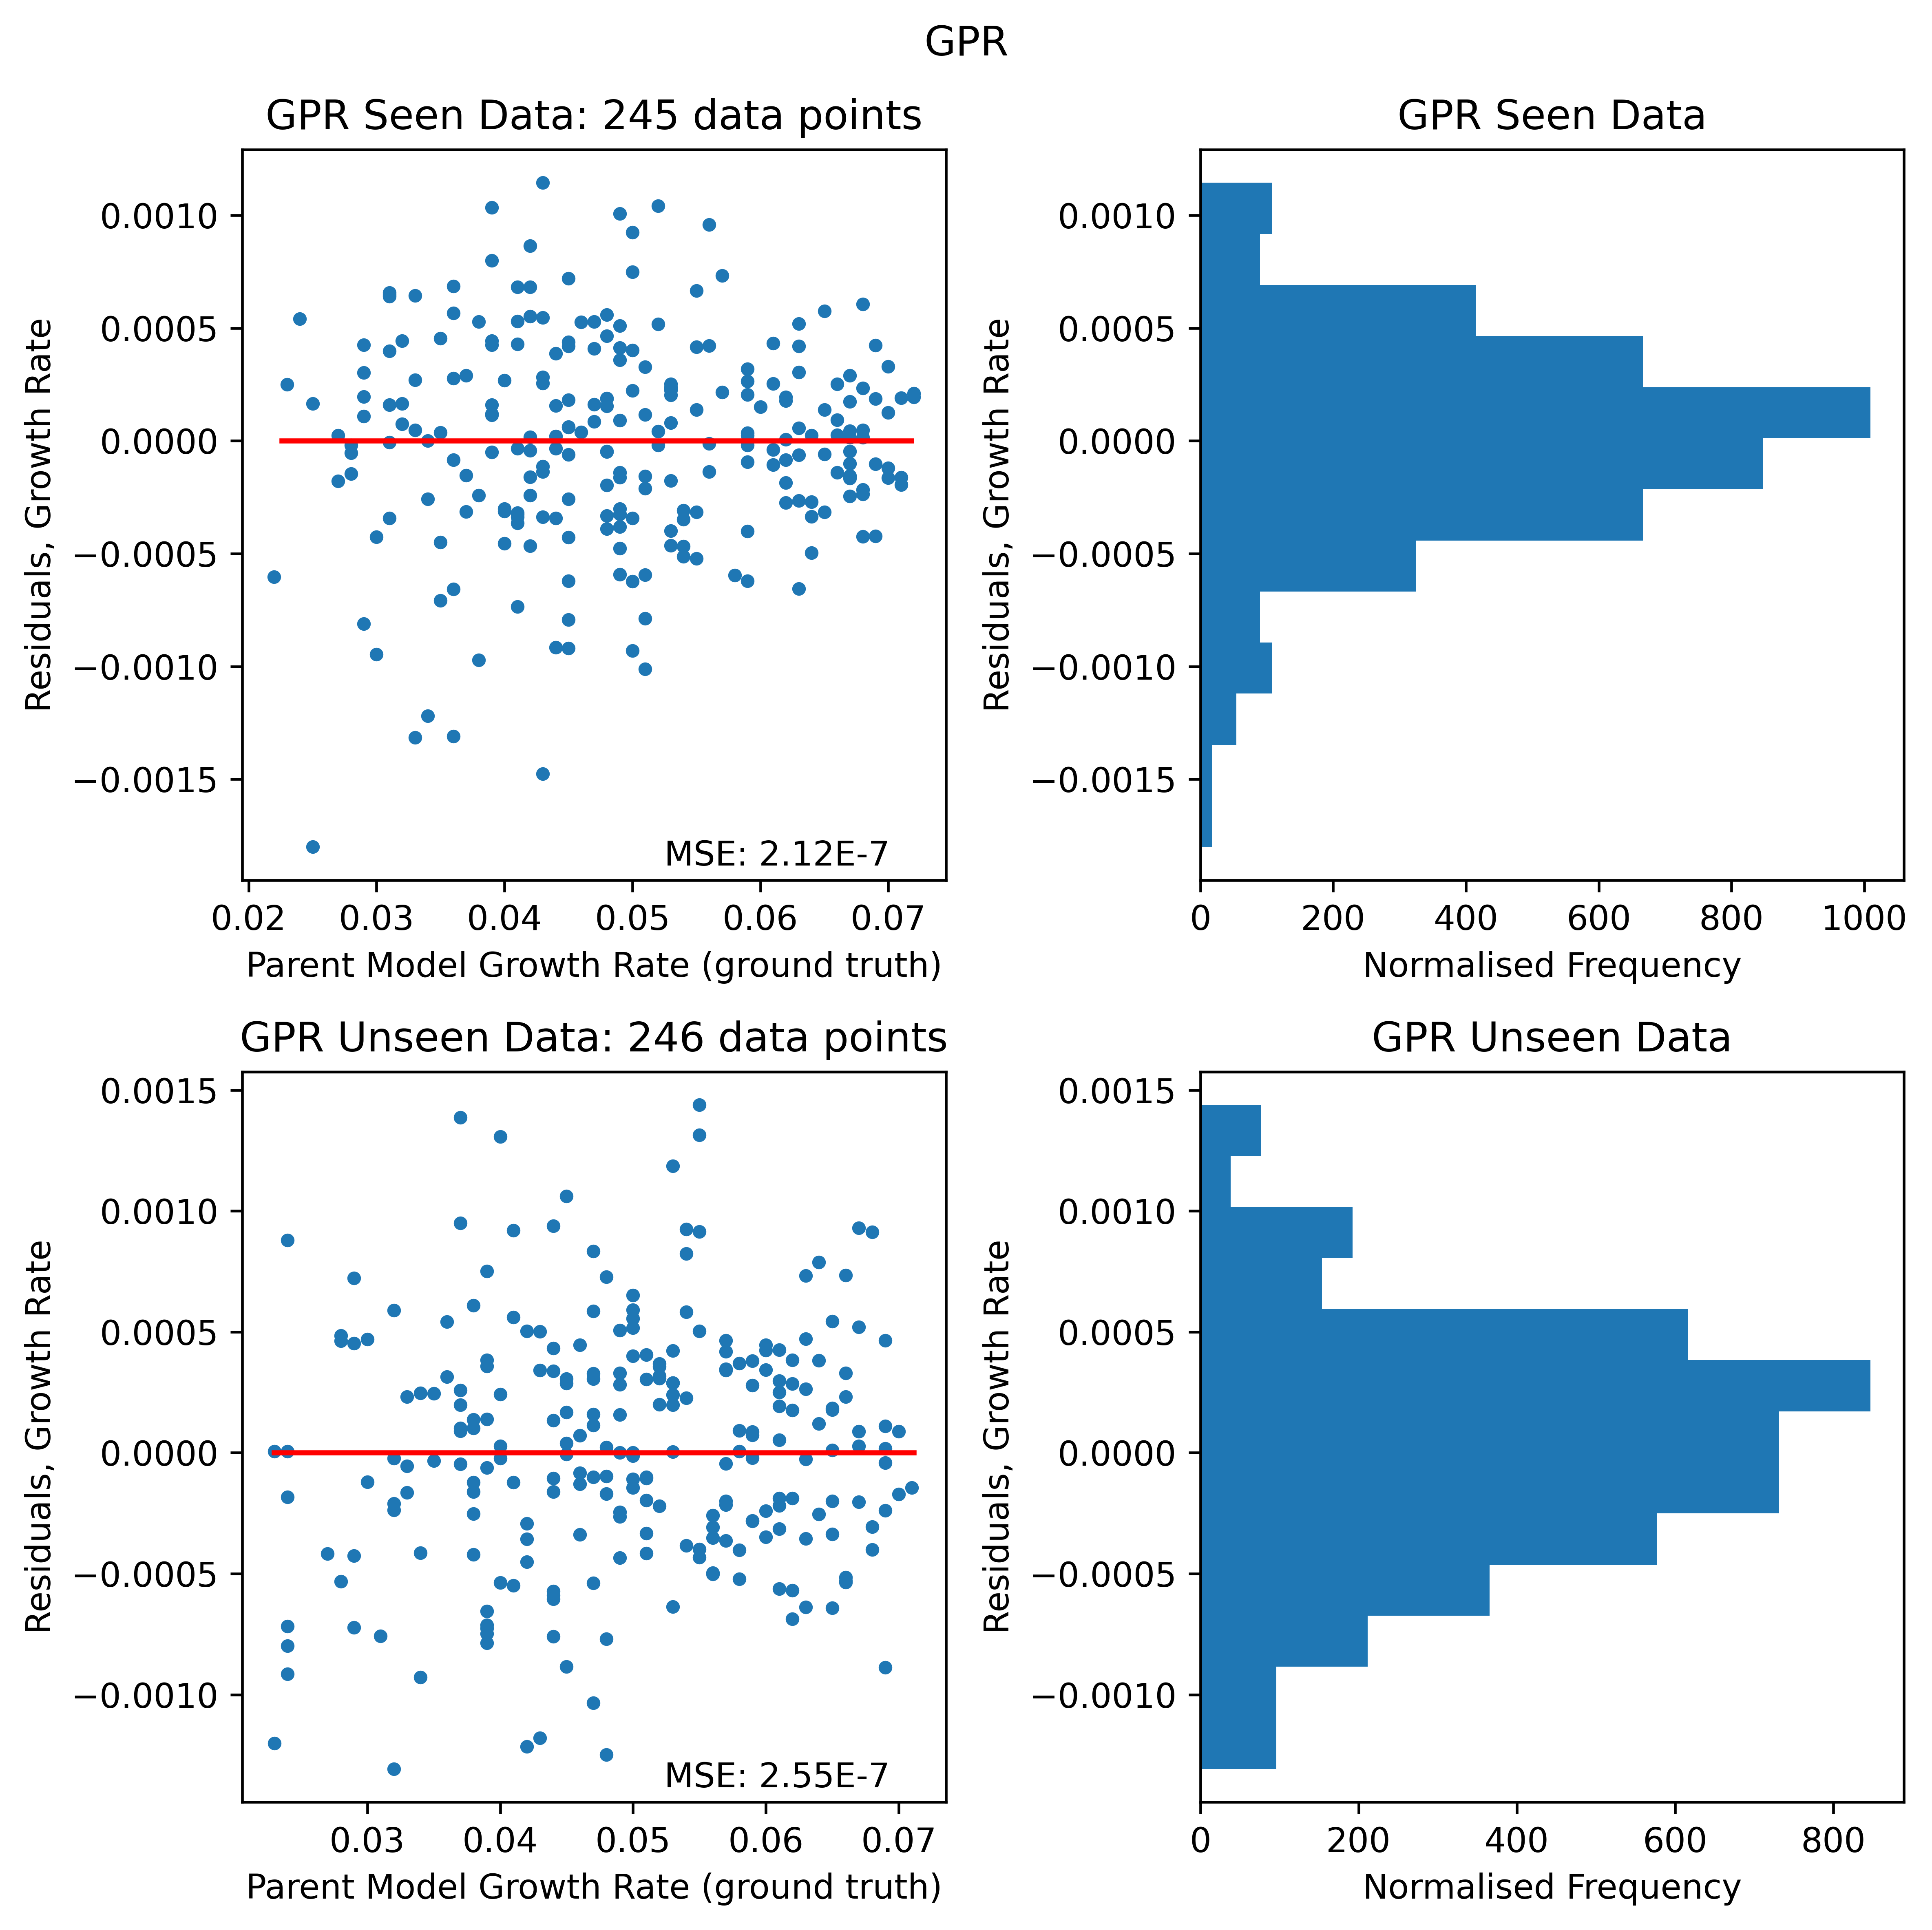

In [15]:
import matplotlib.pyplot as plt
from GENE_ML.gene_ml import visualise as vis

ncol=2
nrow=2
size=4
model_name = 'GPR'
fig_residuals, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrow,ncol, figsize=(size*ncol,size*nrow), dpi=600)
    
vis.residual_plot(ax1, fig_residuals, random_data.growthrate_train, results_gpr.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')#, y_pred_err=growthrate_predict_seen_errors)
vis.residual_hist(ax2, fig_residuals, random_data.growthrate_train, results_gpr.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data', bins=13)

vis.residual_plot(ax3, fig_residuals, random_data.growthrate_test, results_gpr.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')#, y_pred_err=growthrate_predict_unseen_errors)
vis.residual_hist(ax4, fig_residuals, random_data.growthrate_test, results_gpr.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data', bins=13)

# ax4.sharex(ax2)

fig_residuals.suptitle(model_name)
fig_residuals.tight_layout()
fig_residuals.show()

In [34]:
# fixing 1 nan with GPR prediction

guess_growthrate = gpr.predict(np.array([[5.350000,2.338905]]))


(1, 1)
[[0.03128935]]


In [17]:
import numpy as np
from GENE_ML.gene_ml.samplers.gaussian import Gaussian

num_samples_g = 100000
gaussian = Gaussian(bounds, num_samples_g, parameters)

gaussian.samples_np.shape

(100000, 2)

(100000, 1)
[[0.03695815]
 [0.05068729]
 [0.03394817]
 ...
 [0.05228703]
 [0.03153392]
 [0.04450451]]
(1, 1)
[[0.04685942]]
(1, 1)
[[0.02333979]]
(1, 1)
[[0.06844102]]
RESULTS POLY EXISTS, LOADING


 /tmp/ipykernel_100502/998040390.py:45: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


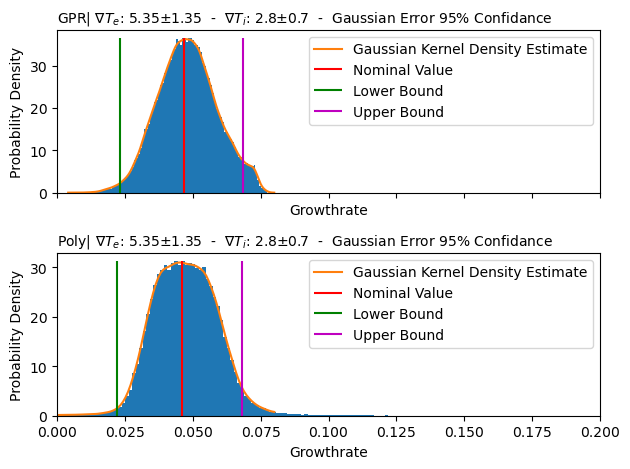

In [18]:
from scipy import stats
from GENE_ML.gene_ml import visualise as vis
from GENE_ML.gene_ml.results.results import ResultsUQ

# growthrates, _ = gpr.predict(gaussian.samples_np)

fig_uq, [ax1,ax2] = plt.subplots(2,1, sharex=True)

results_uq_gpr = ResultsUQ('uq_gpr.resultsuq')
results_uq_gpr.growthrate_predict_uqsamples = gpr.predict(gaussian.samples_np)[0]
nominal_parameters = np.array([np.mean(b) for b in bounds]).reshape((2,1)).T
results_uq_gpr.bounds = bounds
results_uq_gpr.nominal_parameters = nominal_parameters
results_uq_gpr.growthrate_nominal = gpr.predict(nominal_parameters)[0]
lower_bounds = np.array([b[0] for b in bounds]).reshape(2,1).T
results_uq_gpr.growthrate_lower_bound = gpr.predict(lower_bounds)[0]
upper_bounds = np.array([b[1] for b in bounds]).reshape(2,1).T
results_uq_gpr.growthrate_upper_bound = gpr.predict(upper_bounds)[0]

# ax1.set_title('GPR')
vis.forward_uq(ax1, results_uq_gpr, nbins=100, model_name='GPR', xlim=[0,0.2])

results_uq_poly = ResultsUQ('uq_poly.resultsuq')
if results_uq_poly.exists():
    print('RESULTS POLY EXISTS, LOADING')
    results_uq_poly = results_uq_poly.load()
else:
    print('RESULTS POLY DOES NOT EXIST, COMPUTING')
    results_uq_poly.growthrate_predict_uqsamples = poly.predict(gaussian.samples_np)
    nominal_parameters = np.array([np.mean(b) for b in bounds]).reshape((2,1)).T
    results_uq_poly.bounds = bounds
    results_uq_poly.nominal_parameters = nominal_parameters
    results_uq_poly.growthrate_nominal = poly.predict(nominal_parameters)
    lower_bounds = np.array([b[0] for b in bounds]).reshape(2,1).T
    results_uq_poly.growthrate_lower_bound = poly.predict(lower_bounds)
    upper_bounds = np.array([b[1] for b in bounds]).reshape(2,1).T
    results_uq_poly.growthrate_upper_bound = poly.predict(upper_bounds)
    results_uq_poly.save()

# ax2.set_title('Polynomial')
vis.forward_uq(ax2, results_uq_poly, nbins=1000, model_name='Poly',xlim=[0,0.2])

# fig_residuals.suptitle(model_name)
fig_uq.tight_layout()
fig_uq.show()


In [20]:
import numpy as np
from GENE_ML.gene_ml.samplers.uniform import Uniform

num_samples_u = 100000
uniform = Uniform(bounds, num_samples_u, parameters)

uniform.samples_np.shape

(100000, 2)

(100000, 1)
[[0.04286835]
 [0.04291196]
 [0.04245636]
 ...
 [0.05441054]
 [0.0567664 ]
 [0.03190693]]
(1, 1)
[[0.04685942]]
(1, 1)
[[0.02333979]]
(1, 1)
[[0.06844102]]
CONF95 0.0252642342238226
MEAN VAR 0.04932717612501376 0.00015688044237805978
RESULTS POLY EXISTS, LOADING
CONF95 0.02545618438859956
MEAN VAR 0.04841556781596371 0.000158403962217247


 /tmp/ipykernel_100502/2951221214.py:47: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


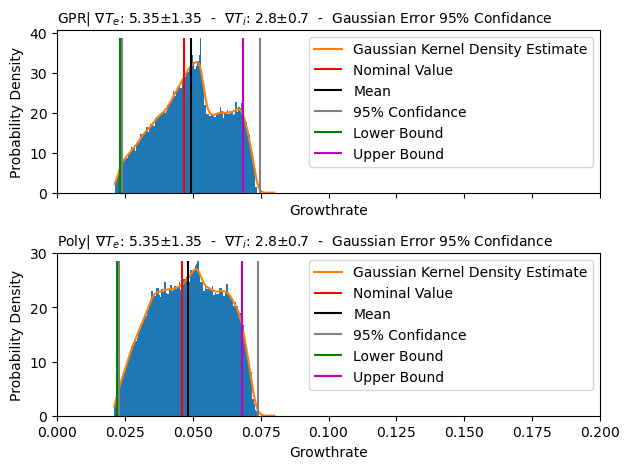

In [44]:
from scipy import stats
from GENE_ML.gene_ml import visualise as vis
from GENE_ML.gene_ml.results.results import ResultsUQ

# growthrates, _ = gpr.predict(gaussian.samples_np)

fig_uq, [ax1,ax2] = plt.subplots(2,1, sharex=True)

results_uq_gpr = ResultsUQ('uq_gpr_uniform.resultsuq')
results_uq_gpr.growthrate_predict_uqsamples = gpr.predict(uniform.samples_np)[0]
nominal_parameters = np.array([np.mean(b) for b in bounds]).reshape((2,1)).T
results_uq_gpr.bounds = bounds
results_uq_gpr.nominal_parameters = nominal_parameters
results_uq_gpr.growthrate_nominal = gpr.predict(nominal_parameters)[0]
lower_bounds = np.array([b[0] for b in bounds]).reshape(2,1).T
results_uq_gpr.growthrate_lower_bound = gpr.predict(lower_bounds)[0]
upper_bounds = np.array([b[1] for b in bounds]).reshape(2,1).T
results_uq_gpr.growthrate_upper_bound = gpr.predict(upper_bounds)[0]

# ax1.set_title('GPR')
vis.forward_uq(ax1, results_uq_gpr, nbins=100, model_name='GPR', xlim=[0,0.2])

results_uq_poly = ResultsUQ('uq_poly_uniform.resultsuq')
if results_uq_poly.exists():
    print('RESULTS POLY EXISTS, LOADING')
    results_uq_poly = results_uq_poly.load()
else:
    print('RESULTS POLY DOES NOT EXIST, COMPUTING')
    results_uq_poly.growthrate_predict_uqsamples = poly.predict(uniform.samples_np)
    nominal_parameters = np.array([np.mean(b) for b in bounds]).reshape((2,1)).T
    results_uq_poly.bounds = bounds
    results_uq_poly.nominal_parameters = nominal_parameters
    results_uq_poly.growthrate_nominal = poly.predict(nominal_parameters)
    lower_bounds = np.array([b[0] for b in bounds]).reshape(2,1).T
    results_uq_poly.growthrate_lower_bound = poly.predict(lower_bounds)
    upper_bounds = np.array([b[1] for b in bounds]).reshape(2,1).T
    results_uq_poly.growthrate_upper_bound = poly.predict(upper_bounds)
    results_uq_poly.save()



# ax2.set_title('Polynomial')
vis.forward_uq(ax2, results_uq_poly, nbins=100, model_name='Poly',xlim=[0,0.2])

# fig_residuals.suptitle(model_name)
fig_uq.tight_layout()
fig_uq.show()


In [30]:
print(results_uq_poly.growthrate_predict_unseen)
test_mean_var = np.array([np.mean(results_uq_poly.growthrate_predict_uqsamples), np.var(results_uq_poly.growthrate_predict_uqsamples)])
model_pred_mean_var = np.array(poly.mean_var_est())
print('TEST PREDICTIONS MEAN AND VAR', test_mean_var)
print('MODEL DERIVED ESTIMATE OF MEAN AND VAR',model_pred_mean_var)
print('DIFFERENCE', np.abs(model_pred_mean_var-test_mean_var))


None
TEST PREDICTIONS MEAN AND VAR [0.04841557 0.0001584 ]
MODEL DERIVED ESTIMATE OF MEAN AND VAR [0.04841009 0.00015806]
DIFFERENCE [5.47815973e-06 3.47125547e-07]


[[4.656747 3.161537]
 [4.142848 3.328288]
 [4.39567  3.441717]
 [5.851016 2.526608]
 [5.346428 2.19731 ]
 [6.245883 2.208358]
 [4.539037 2.281065]
 [4.881863 2.822348]
 [4.052941 2.666556]
 [5.752202 3.437585]]
[0.062 0.067 0.071 0.038 0.031 0.048 0.029 0.049 0.045 0.069]
SHAPE (1, 2) (243, 2)


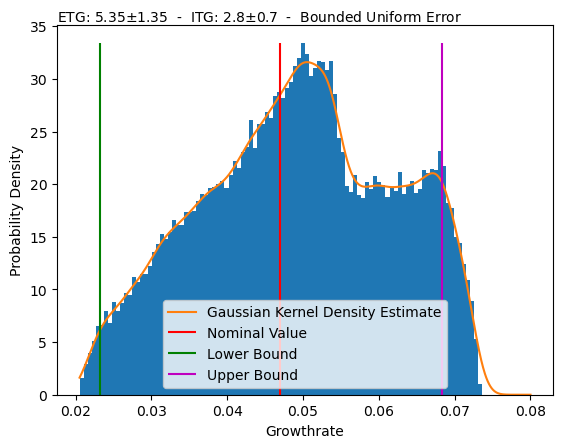

In [172]:
from scipy import stats
growthrates, _ = gpr.predict(uniform.samples_np)
print(data_set.x_train[0:10])
print(data_set.growthrate_train[0:10])

bounds = [(4,6.7), (2.1,3.5)]
nominal_parameters = np.array([np.mean(b) for b in bounds]).reshape((2,1)).T
print('SHAPE', nominal_parameters.shape, data_set.x_train.shape)
nominal_growthrate, _ = gpr.predict(nominal_parameters)
left_bound_gr, _ = gpr.predict(np.array([b[0] for b in bounds]).reshape(2,1).T)
right_bound_gr, _ = gpr.predict(np.array([b[1] for b in bounds]).reshape(2,1).T)

kde = stats.gaussian_kde(growthrates)
hist_x = np.linspace(np.min(growthrates),0.08, 1000)
n, bins, _ = plt.hist(growthrates, bins=100, density=True)
plt.plot(hist_x, kde(hist_x), label='Gaussian Kernel Density Estimate')
plt.xlabel('Growthrate')
plt.ylabel('Probability Density')
plt.vlines(nominal_growthrate, 0, max(n), 'r', label='Nominal Value')
plt.vlines(left_bound_gr, 0, max(n), 'g', label='Lower Bound')
plt.vlines(right_bound_gr, 0, max(n), 'm', label='Upper Bound')
plt.annotate(f'ETG: {nominal_parameters[0][0]}$\pm$1.35  -  ITG: {nominal_parameters[0][1]}$\pm$0.7  -  Bounded Uniform Error',
            xy=(0, 1.01), xycoords='axes fraction',fontsize=10)

plt.legend()
plt.show()



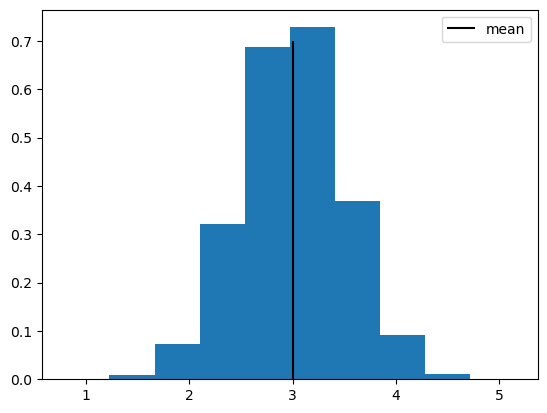

In [40]:
samples = np.random.normal(loc=3, scale=0.5, size = 100000)

plt.hist(samples, density=True)
plt.vlines(np.mean(samples), 0, 0.7, color='black', label='mean')
plt.vlines(np.mean(samples)+np.var, 0, 0.7, color='black', label='mean')
plt.legend()